<a href="https://colab.research.google.com/github/LOWERCAS3/PyTorch/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch computer vision
Reference Doc: https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch
* `torchvision` - base domain library for PyTorch computer vision.
* `torchvision.datasets` - get datasets and data loading funtions for computer vision here.
* `torchvision.model` - get pretrained computer vision models that you can leverage for your own problems.
* `torchvision.transforms` - funtions for manipulation you vision data (images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset` - base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - creates a python iterable over a dataset.

In [5]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


## 1. Getting a dataset
The dataset used id FashionMNIST from torchvision.datasets

In [6]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want ot transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [7]:
len(train_data), len(test_data)

(60000, 10000)

In [17]:
# See the first training example
image, label = train_data[18]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0078, 0.0000, 0.0000,
           0.0235, 0.1412, 0.3098, 0.0941, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.1216, 0.2863, 0.0039, 0.0000, 0.0000, 0.0000, 0.0078,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.6000,
           0.6275, 0.6000, 0.6902, 0.7412, 0.7373, 0.7608, 0.5686, 0.6039,
           0.5843, 0.7529, 0.7020, 0.5686, 0.6314, 0.3255, 0.0000, 0.0000,
           0.0078, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.5294, 0.6667,
           0.5647, 0.5882, 0.5765, 0.6353, 0.7333, 0.4157, 0.0039, 0.7843,
           0.6941, 0.6510, 0.5725, 0.5843, 0.5922, 0.6627, 0.4431, 0.0000,
           0.0118, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.1333, 0.7020, 0.5843,
           0.5922, 0.5882, 0.5686, 0.5294, 0.6627, 0.5333, 0.3373, 0.7451,
           0.6118, 0.5608, 0.5725, 0.5804, 

In [18]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [20]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of our data

In [21]:
# Check the shape of our images
print(f"Image Shape: {image.shape} -> [color_channel, height, width]")
print(f"Image label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Image label: Shirt


### 1.2 Visualizing our data
using a single element in training data and visualizing it using plt.imshow.

**NOTE** `matplotlib` , `numpy` and similar frameworks expects the image data to be in format (height, width , color_channel), hence we might need to modify our dataset since `torchvision` creates data in format `(color_channel, height, weight)`

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

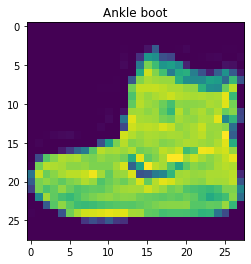

In [26]:
import matplotlib.pyplot as plt
image, label = train_data[0] # Picking a random data point 0 in train_data
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

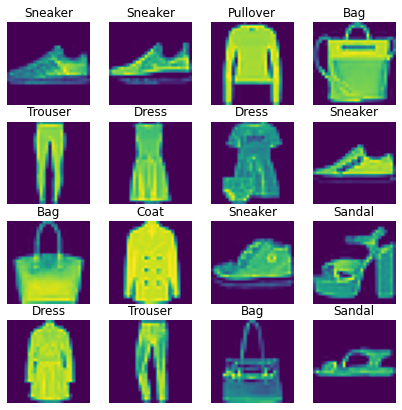

In [39]:
# Plotting random images
# torch.manual_seed(42)
fig = plt.figure(figsize=(7, 7))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze())
  plt.title(class_names[label])
  plt.axis(False);